In [1]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [67]:
y_pred = np.genfromtxt('data/SVM-pred-vicon_proc01-Feb-2018.csv', delimiter=',') 
y_true = np.genfromtxt('data/SVM-true-vicon_proc01-Feb-2018.csv', delimiter=',')

In [74]:
y_gauss = gaussian_filter1d(y_pred, 2.5, axis=0)

In [75]:
print(r2_score(y_true, y_gauss, multioutput='raw_values'))
print(r2_score(y_true, y_gauss))
print(r2_score(y_true, y_pred, multioutput='raw_values'))
print(r2_score(y_true, y_pred))

[ 0.6961133   0.53619898  0.83221213  0.83759985  0.64987566]
0.710399982552
[ 0.66792911  0.47798366  0.83755114  0.81324324  0.59431323]
0.678204075985


In [83]:
plt.plot(y_true[:, 4])
plt.plot(y_pred[:, 4])
plt.plot(y_gauss[:, 4])
plt.xlabel('Time')
plt.ylabel('Angle')
plt.legend(('Gound truth', 'Prediction', 'Smoothed prediction'))
# plt.savefig('data/svm_smoothing.png')
plt.show()

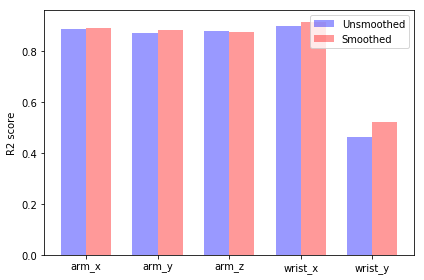

In [20]:
r2_raw = r2_score(y_true, y_pred, multioutput='raw_values')
r2_gauss = r2_score(y_true, y_gauss, multioutput='raw_values')
n_groups = 5

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, r2_raw, bar_width,
                alpha=opacity, color='b',
                label='Unsmoothed')

rects2 = ax.bar(index + bar_width, r2_gauss, bar_width,
                alpha=opacity, color='r',
                label='Smoothed')

ax.set_ylabel('R2 score')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('arm_x', 'arm_y', 'arm_z', 'wrist_x', 'wrist_y'))
ax.legend()

fig.tight_layout()
plt.savefig('data/r2_smooth.png')

In [5]:
np.savetxt('data/SVM-pred-smooth-01-Feb-2018.csv', y_smooth, '%.5f', ',')

In [6]:
y_smooth.shape

(473, 5)

In [81]:
# exponential moving average
alpha = 0.38
y_smooth = np.zeros_like(y_pred)
y_smooth[0] = y_pred[0]
for i in range(1, y_pred.shape[0]):
    y_smooth[i] = alpha * y_pred[i] + (1 - alpha) * y_smooth[i - 1]

In [82]:
print(r2_score(y_true, y_pred))
print(r2_score(y_true, y_pred, multioutput='raw_values'))
print(r2_score(y_true, y_smooth))
print(r2_score(y_true, y_smooth, multioutput='raw_values'))

0.678204075985
[ 0.66792911  0.47798366  0.83755114  0.81324324  0.59431323]
0.722032306273
[ 0.71468452  0.50064564  0.86540453  0.84712035  0.68230649]


In [87]:
plt.plot(y_true[:, 4])
plt.plot(y_pred[:, 4])
plt.plot(y_smooth[:, 4])
plt.xlabel('Time')
plt.ylabel('Angle')
plt.legend(('Gound truth', 'Prediction', 'Smoothed prediction'))
plt.savefig('data/svm_wrist_smooth.png')
# plt.show()

In [86]:
np.savetxt('data/SVM-pred-wrist-smooth-Feb-2018.csv', y_smooth, delimiter=',')